<a href="https://colab.research.google.com/github/paulosky311/Challenge-Alura-Store/blob/main/Challenger_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenger_Telecom_Latam**

# 📌 Extracción

In [92]:
import pandas as pd

In [93]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# 🔧 Transformación

###Diccionario de Datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [95]:
from pandas import json_normalize

df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [96]:
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [97]:
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50:
    print(df_normalizado[col].unique())
    print(''*50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']

valores únicos en la columna'customer.gender': 2
['Female' 'Male']

valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]

valores únicos en la columna'customer.Partner': 2
['Yes' 'No']

valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']

valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']

valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']

valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']

valores únicos en la columna'internet.OnlineSecurity': 3
['No' 'Yes' 'No internet service']

valores únicos en la columna'internet.OnlineBackup': 3
['Yes' 'No' 'No internet service']

valores únicos en la columna'internet.DeviceProtection': 3
['No' 'Yes' 'No internet service']

valores únicos en la columna'internet.TechSupport': 3
['Yes' 'No' 'N

In [98]:
valores_blanco_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacíos por columna:")
print(valores_blanco_vacios[valores_blanco_vacios > 0])


Valores en blanco o string vacíos por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [99]:
df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [100]:
df_normalizado.rename(columns={
    'customerID': 'Id_cliente',
    'Churn': 'churn',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'Adulto_mayor',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'dependientes',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_movies',
    'account.Contract': 'contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'facturacion_mensual',
    'account.Charges.Total': 'gasto_total'
}, inplace=True)

In [101]:

df_normalizado['gasto_total'] = df_normalizado['gasto_total'].replace('[\$,]', '', regex=True)

df_normalizado['gasto_total'] = pd.to_numeric(df_normalizado['gasto_total'], errors='coerce')


print(df_normalizado['gasto_total'].dtypes)
print(df_normalizado['gasto_total'].isna().sum())


float64
11


In [102]:
df_normalizado = df_normalizado[df_normalizado['churn'].notna()]        # elimina nulos
df_normalizado = df_normalizado[df_normalizado['churn'] != '']          # elimina vacíos

print("Valores nulos después de limpiar:", df_normalizado['churn'].isna().sum())
print("Valores vacíos después de limpiar:", (df_normalizado['churn'] == '').sum())

Valores nulos después de limpiar: 0
Valores vacíos después de limpiar: 0


In [103]:
#Estandarización de valores "Yes"/"No"


yes_no_columnas = [col for col in df_normalizado.columns if df_normalizado[col].dropna().isin(['Yes', 'No']).all()]

print("Columnas con valores 'Yes'/'No':")
print(yes_no_columnas)


df_normalizado[yes_no_columnas] = df_normalizado[yes_no_columnas].replace({'Yes': 1, 'No': 0})


print(df_normalizado[yes_no_columnas].head())


Columnas con valores 'Yes'/'No':
['churn', 'Partner', 'dependientes', 'servicio_telefonico', 'factura_digital']
   churn  Partner  dependientes  servicio_telefonico  factura_digital
0      0        1             1                    1                1
1      0        0             0                    1                0
2      1        0             0                    1                1
3      1        1             0                    1                1
4      1        1             0                    1                1


/tmp/ipython-input-103-1648158233.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[yes_no_columnas] = df_normalizado[yes_no_columnas].replace({'Yes': 1, 'No': 0})


In [104]:
columnas_extra = [
    'respaldo_online','proteccion_dispositivo',	'soporte_tecnico','streaming_tv','streaming_movies','multiples_lineas']


valores_a_reemplazar = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}


df_normalizado[columnas_extra] = df_normalizado[columnas_extra].replace(valores_a_reemplazar)


print(df_normalizado[columnas_extra].head())


   respaldo_online  proteccion_dispositivo  soporte_tecnico  streaming_tv  \
0                1                       0                1             1   
1                0                       0                0             0   
2                0                       1                0             0   
3                1                       1                0             1   
4                0                       0                1             1   

   streaming_movies  multiples_lineas  
0                 0                 0  
1                 1                 1  
2                 0                 0  
3                 1                 0  
4                 0                 0  


/tmp/ipython-input-104-3117327945.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_extra] = df_normalizado[columnas_extra].replace(valores_a_reemplazar)


**Columna de cuentas diarias**

In [105]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['facturacion_mensual'] / 30

df_normalizado.head()


,Id_cliente,churn,genero,Adulto_mayor,Partner,dependientes,tenure,servicio_telefonico,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_movies,contrato,factura_digital,metodo_pago,facturacion_mensual,gasto_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# 📊 Carga y análisis

In [106]:
df_normalizado.describe(percentiles=None, include=None, exclude=None)

,churn,Adulto_mayor,Partner,dependientes,tenure,servicio_telefonico,multiples_lineas,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_movies,factura_digital,facturacion_mensual,gasto_total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


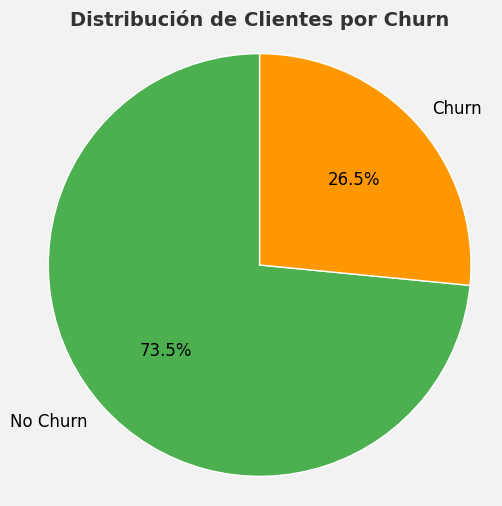

In [117]:
import matplotlib.pyplot as plt


churn_graf = df_normalizado['churn'].value_counts()


colors = ['#4CAF50', '#FF9800']  # Verde, Naranjo
labels = churn_graf.index.map({0: 'No Churn', 1: 'Churn'})


fig, ax = plt.subplots(figsize=(6, 6), facecolor='#f2f2f2')  # Fondo gris suave
ax.pie(
    churn_graf,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('Distribución de Clientes por Churn', fontsize=14, weight='bold', color='#333333')


ax.axis('equal')

plt.show()

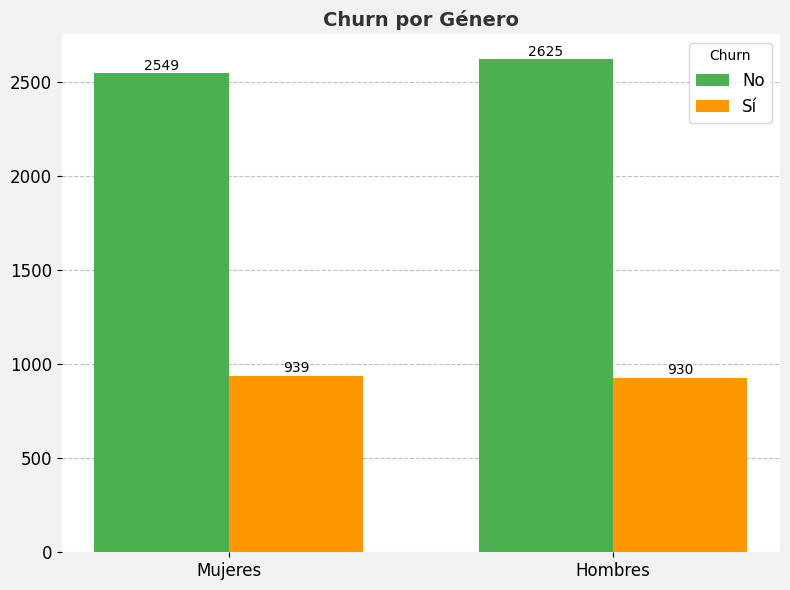

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar churn por género
churn_genero = df_normalizado.groupby(['genero', 'churn']).size().unstack().fillna(0)

# Renombrar índices
churn_genero.index = churn_genero.index.map({'Female': 'Mujeres', 'Male': 'Hombres'})

# Configuración estética
colors = ['#4CAF50', '#FF9800']  # Verde (No), Naranjo (Sí)
bar_width = 0.35
index = range(len(churn_genero))

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#f2f2f2')

# Barras para "No" (0) and "Sí" (1)
bars_no = ax.bar(index, churn_genero[0], bar_width, label='No', color=colors[0])
bars_si = ax.bar([i + bar_width for i in index], churn_genero[1], bar_width, label='Sí', color=colors[1])

# Etiquetas de valores sobre las barras
for bar in bars_no:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color='black')

for bar in bars_si:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color='black')

# Título y etiquetas
ax.set_title('Churn por Género', fontsize=14, weight='bold', color='#333333')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(churn_genero.index, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Estética limpia
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_axisbelow(True)

# Leyenda
ax.legend(title='Churn', fontsize=12)

plt.tight_layout()
plt.show()

# 📄Informe final